In [503]:
#importing libraries
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [504]:
#Load the data from the API

limit = 30
total = 0
skip = 0
listpd = []
page = 0

while True:
    url = f"https://dummyjson.com/users?limit={limit}&skip={skip}"
    response = requests.get(url)
    json_data = response.json()

    data = json_data['users']
    total = json_data['total']


    listpd.append(pd.json_normalize(data))

    skip += limit
    page += 1

    print(f"Fetched page {page}")

    if skip >= total:
        break

#combine all pages
users = pd.concat(listpd, ignore_index=True)

print(users)

#save to CSV
users.to_csv("users.csv", index=False)
print("Saved to users.csv")

Fetched page 1
Fetched page 2
Fetched page 3
Fetched page 4
Fetched page 5
Fetched page 6
Fetched page 7
      id firstName  lastName maidenName  age  gender  \
0      1     Emily   Johnson      Smith   29  female   
1      2   Michael  Williams              36    male   
2      3    Sophia     Brown              43  female   
3      4     James     Davis              46    male   
4      5      Emma    Miller    Johnson   31  female   
..   ...       ...       ...        ...  ...     ...   
203  204     Mateo     Perez              46    male   
204  205    Aubrey    Garcia       Gray   29  female   
205  206     Elena     Baker              35  female   
206  207      Jace     Smith              42    male   
207  208  Samantha  Martinez      Lopez   28  female   

                                 email             phone   username  \
0        emily.johnson@x.dummyjson.com  +81 965-431-3024     emilys   
1     michael.williams@x.dummyjson.com  +49 258-627-6644   michaelw   
2        

In [505]:
df = pd.read_csv("users.csv")
df

,id,firstName,lastName,maidenName,age,gender,email,phone,username,password,...,company.address.city,company.address.state,company.address.stateCode,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.wallet,crypto.network
0,1,Emily,Johnson,Smith,29,female,emily.johnson@x.dummyjson.com,+81 965-431-3024,emilys,emilyspass,...,San Francisco,Wisconsin,WI,37657,71.814525,-161.150263,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
1,2,Michael,Williams,NaN,36,male,michael.williams@x.dummyjson.com,+49 258-627-6644,michaelw,michaelwpass,...,Los Angeles,New Hampshire,NH,73442,79.098326,-119.624845,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
2,3,Sophia,Brown,NaN,43,female,sophia.brown@x.dummyjson.com,+81 210-652-2785,sophiab,sophiabpass,...,Dallas,Nevada,NV,88511,20.086743,-34.577107,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
3,4,James,Davis,NaN,46,male,james.davis@x.dummyjson.com,+49 614-958-9364,jamesd,jamesdpass,...,Fort Worth,Pennsylvania,PA,27768,54.911930,-79.498328,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
4,5,Emma,Miller,Johnson,31,female,emma.miller@x.dummyjson.com,+91 759-776-1614,emmaj,emmajpass,...,San Antonio,Idaho,ID,21965,44.346545,-26.944701,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,Mateo,Perez,NaN,46,male,mateo.perez@x.dummyjson.com,+44 704-302-8113,mateop,mateoppass,...,Denver,Arizona,AZ,10591,18.569908,-50.337520,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
204,205,Aubrey,Garcia,Gray,29,female,aubrey.garcia@x.dummyjson.com,+1 470-576-9130,aubreyg,aubreygpass,...,San Francisco,Minnesota,MN,58649,3.609112,-35.397672,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
205,206,Elena,Baker,NaN,35,female,elena.baker@x.dummyjson.com,+49 978-346-6960,elenab,elenabpass,...,San Antonio,Idaho,ID,50546,1.356153,175.897893,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
206,207,Jace,Smith,NaN,42,male,jace.smith@x.dummyjson.com,+1 634-923-7779,jaces,jacespass,...,San Francisco,Arizona,AZ,19079,2.230209,84.272010,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)


In [506]:
#Basic Data Exploration

#Shape of the DataFrame (rows, columns)

print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Shape: 208 rows, 52 columns


In [507]:
#List of all column names

print(df.columns.tolist())

['id', 'firstName', 'lastName', 'maidenName', 'age', 'gender', 'email', 'phone', 'username', 'password', 'birthDate', 'image', 'bloodGroup', 'height', 'weight', 'eyeColor', 'ip', 'macAddress', 'university', 'ein', 'ssn', 'userAgent', 'role', 'hair.color', 'hair.type', 'address.address', 'address.city', 'address.state', 'address.stateCode', 'address.postalCode', 'address.coordinates.lat', 'address.coordinates.lng', 'address.country', 'bank.cardExpire', 'bank.cardNumber', 'bank.cardType', 'bank.currency', 'bank.iban', 'company.department', 'company.name', 'company.title', 'company.address.address', 'company.address.city', 'company.address.state', 'company.address.stateCode', 'company.address.postalCode', 'company.address.coordinates.lat', 'company.address.coordinates.lng', 'company.address.country', 'crypto.coin', 'crypto.wallet', 'crypto.network']


In [508]:
#Data types of each column (df.dtypes)

df.dtypes

id                                   int64
firstName                           object
lastName                            object
maidenName                          object
age                                  int64
gender                              object
email                               object
phone                               object
username                            object
password                            object
birthDate                           object
image                               object
bloodGroup                          object
height                             float64
weight                             float64
eyeColor                            object
ip                                  object
macAddress                          object
university                          object
ein                                 object
ssn                                 object
userAgent                           object
role                                object
hair.color 

In [509]:
#Number of missing values per column (isnull().sum())

df.isnull().sum()

id                                   0
firstName                            0
lastName                             0
maidenName                         148
age                                  0
gender                               0
email                                0
phone                                0
username                             0
password                             0
birthDate                            0
image                                0
bloodGroup                           0
height                               0
weight                               0
eyeColor                             0
ip                                   0
macAddress                           0
university                           0
ein                                  0
ssn                                  0
userAgent                            0
role                                 0
hair.color                           0
hair.type                            0
address.address          

In [510]:
#Number of duplicate rows (duplicated().sum())

print(df.duplicated().sum())

0


In [511]:
#Summary statistics for numeric columns (describe())

df.describe()

,id,age,height,weight,address.postalCode,address.coordinates.lat,address.coordinates.lng,bank.cardNumber,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000
mean,104.500000,33.139423,175.720240,75.038606,49476.177885,-0.357609,-11.729826,4.352591e+15,51994.442308,2.267603,-2.701298
std,60.188592,5.544269,14.119984,14.090775,21838.772935,53.866250,103.855891,1.871526e+15,23329.345011,50.015813,99.876659
min,1.000000,23.000000,150.250000,50.100000,10672.000000,-89.077500,-179.958549,3.407609e+14,10371.000000,-87.103718,-176.705236
25%,52.750000,29.000000,164.187500,62.547500,31945.750000,-52.583475,-101.197683,3.608283e+15,30837.500000,-40.780079,-83.301244
50%,104.500000,32.000000,177.430000,75.985000,49007.500000,2.925385,-29.607807,4.940431e+15,55624.500000,7.324804,-6.090248
75%,156.250000,36.000000,186.960000,86.992500,65612.500000,45.281022,71.862635,6.011151e+15,72775.750000,43.829917,84.288805
max,208.000000,46.000000,199.810000,99.540000,89729.000000,89.781211,179.922909,6.293711e+15,89416.000000,89.270633,178.804291


In [512]:
#Value counts for important categorical columns (e.g. gender, bloodGroup, eyeColor, role, address.country)

df['gender'].value_counts()

gender
female    106
male      102
Name: count, dtype: int64

In [513]:
df['bloodGroup'].value_counts()

bloodGroup
O-     31
B-     31
AB-    29
AB+    29
B+     25
O+     22
A+     21
A-     20
Name: count, dtype: int64

In [514]:
df['role'].value_counts()

role
user         193
moderator     10
admin          5
Name: count, dtype: int64

In [515]:
df['address.country'].value_counts()

address.country
United States    208
Name: count, dtype: int64

In [516]:
#getting missing values count for all columns

missing_counts = df.isnull().sum()
missing_counts

id                                   0
firstName                            0
lastName                             0
maidenName                         148
age                                  0
gender                               0
email                                0
phone                                0
username                             0
password                             0
birthDate                            0
image                                0
bloodGroup                           0
height                               0
weight                               0
eyeColor                             0
ip                                   0
macAddress                           0
university                           0
ein                                  0
ssn                                  0
userAgent                            0
role                                 0
hair.color                           0
hair.type                            0
address.address          

In [517]:
missing_counts = df.isnull().sum()

# Filter to show only counts greater than 0
non_zero_missing = missing_counts[missing_counts > 0]

non_zero_missing

maidenName    148
dtype: int64

In [518]:
#Data Cleaning

df.describe()

,id,age,height,weight,address.postalCode,address.coordinates.lat,address.coordinates.lng,bank.cardNumber,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000
mean,104.500000,33.139423,175.720240,75.038606,49476.177885,-0.357609,-11.729826,4.352591e+15,51994.442308,2.267603,-2.701298
std,60.188592,5.544269,14.119984,14.090775,21838.772935,53.866250,103.855891,1.871526e+15,23329.345011,50.015813,99.876659
min,1.000000,23.000000,150.250000,50.100000,10672.000000,-89.077500,-179.958549,3.407609e+14,10371.000000,-87.103718,-176.705236
25%,52.750000,29.000000,164.187500,62.547500,31945.750000,-52.583475,-101.197683,3.608283e+15,30837.500000,-40.780079,-83.301244
50%,104.500000,32.000000,177.430000,75.985000,49007.500000,2.925385,-29.607807,4.940431e+15,55624.500000,7.324804,-6.090248
75%,156.250000,36.000000,186.960000,86.992500,65612.500000,45.281022,71.862635,6.011151e+15,72775.750000,43.829917,84.288805
max,208.000000,46.000000,199.810000,99.540000,89729.000000,89.781211,179.922909,6.293711e+15,89416.000000,89.270633,178.804291


In [519]:
#Handle missing values in age, height, weight (fill with mean/median or drop if few)

cols_to_check = ['age', 'height', 'weight']
for col in cols_to_check:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing {col} with {median_val}")
    else:
         print(f"No missing values in {col} column")

No missing values in age column
No missing values in height column
No missing values in weight column


In [520]:
#What is the average age of users? 

avg_age = df['age'].mean()
print(f"Average age: {avg_age:.2f} years")


Average age: 33.14 years


In [521]:
#Average age by gender?
avg_age_gender = df.groupby('gender')['age'].mean()
print(f"Average age by gender:\n{avg_age_gender}")

Average age by gender:
gender
female    31.377358
male      34.970588
Name: age, dtype: float64


In [522]:
#Number of users per gender?

gender_counts = df['gender'].value_counts()
print(f"Number of users per gender:\n{gender_counts}")

Number of users per gender:
gender
female    106
male      102
Name: count, dtype: int64


In [523]:
#Top 10 cities with the most users?

top_10_cities = df['address.city'].value_counts().head(10)
print(f"Top 10 cities:\n{top_10_cities}")

Top 10 cities:
address.city
Phoenix         17
Dallas          15
Jacksonville    14
Los Angeles     14
Seattle         12
Philadelphia    11
Charlotte       11
San Jose        11
Chicago         11
New York        11
Name: count, dtype: int64


In [524]:
#Average height and weight overall?

avg_height = df['height'].mean()
avg_weight = df['weight'].mean()
print(f"Average height: {avg_height:.2f} cm, Average weight: {avg_weight:.2f} kg")

Average height: 175.72 cm, Average weight: 75.04 kg


In [525]:
#Is there any obvious relationship between age and height/weight?
#using correlation

corr_age_height = df['age'].corr(df['height'])
corr_age_weight = df['age'].corr(df['weight'])
corr_height_weight = df['height'].corr(df['weight'])
print(f"Correlation (Age & Height): {corr_age_height:.2f}")
print(f"Correlation (Age & Weight): {corr_age_weight:.2f}")
print(f"Correlation (height & Weight): {corr_height_weight:.2f}")
print("close to 0 ---> almost no linear relationship")

Correlation (Age & Height): 0.02
Correlation (Age & Weight): 0.07
Correlation (height & Weight): -0.09
close to 0 ---> almost no linear relationship


In [526]:
#global sns style

sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(20, 16))
plt.tight_layout()


<Figure size 2000x1600 with 0 Axes>

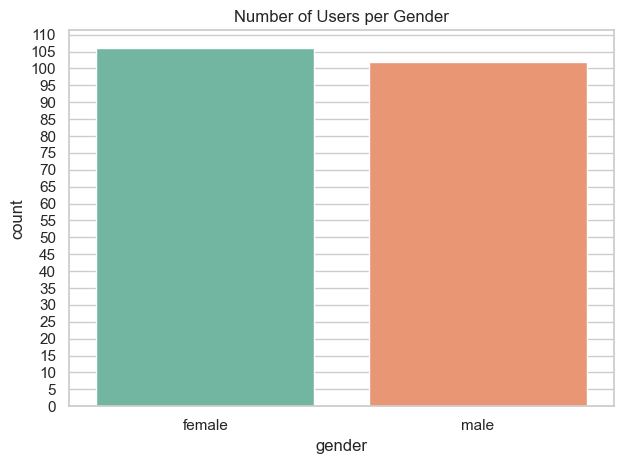

In [527]:
plt.subplot(1, 1, 1)

sns.countplot(data=df, x='gender', hue='gender', palette='Set2', legend=False)

plt.title('Number of Users per Gender')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()
plt.show()

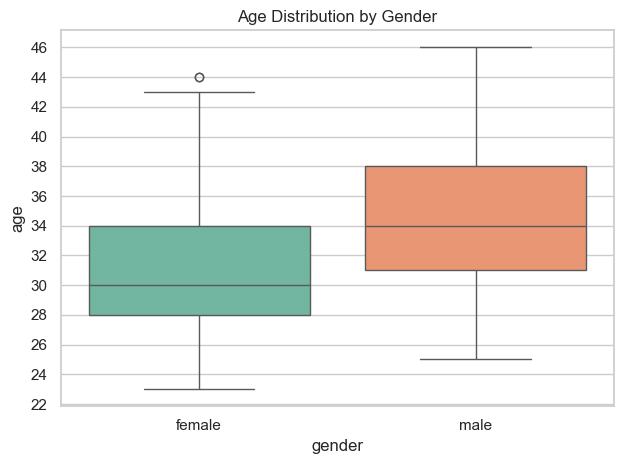

In [545]:
plt.subplot(1, 1, 1)

sns.boxplot(data=df, x='gender', y='age', hue='gender', palette='Set2', legend=False)

plt.title('Age Distribution by Gender')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

plt.tight_layout()
plt.show()

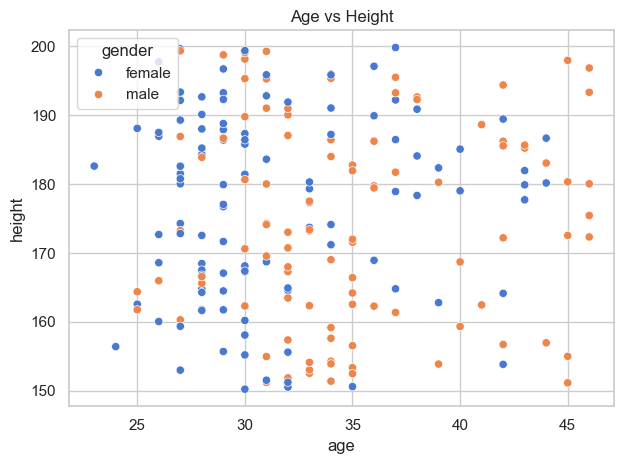

In [529]:
plt.subplot(1, 1, 1)

sns.scatterplot(data=df, x='age', y='height', hue='gender', alpha=1)

plt.title('Age vs Height')

plt.tight_layout()
plt.show()

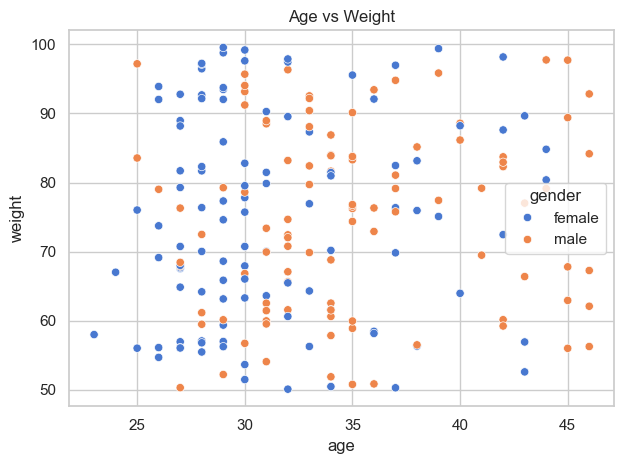

In [530]:
plt.subplot(1, 1, 1)

sns.scatterplot(data=df, x='age', y='weight', hue='gender', alpha=1)

plt.title('Age vs Weight')

plt.tight_layout()
plt.show()

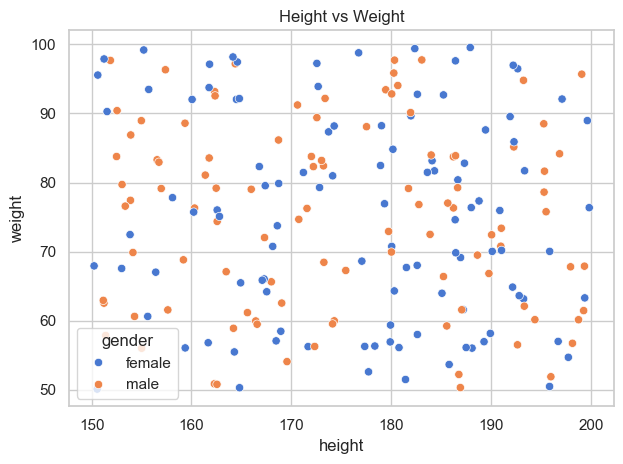

In [531]:
plt.subplot(1, 1, 1)

sns.scatterplot(data=df, x='height', y='weight', hue='gender', alpha=1)

plt.title('Height vs Weight')

plt.tight_layout()
plt.show()

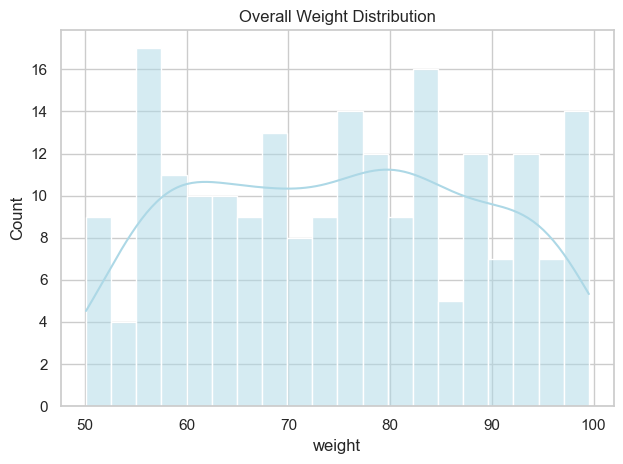

In [532]:
plt.subplot(1, 1, (1, 1))

sns.histplot(data=df, x='weight', kde=True, bins=20, color='lightblue')

plt.title('Overall Weight Distribution')

plt.tight_layout()
plt.show()

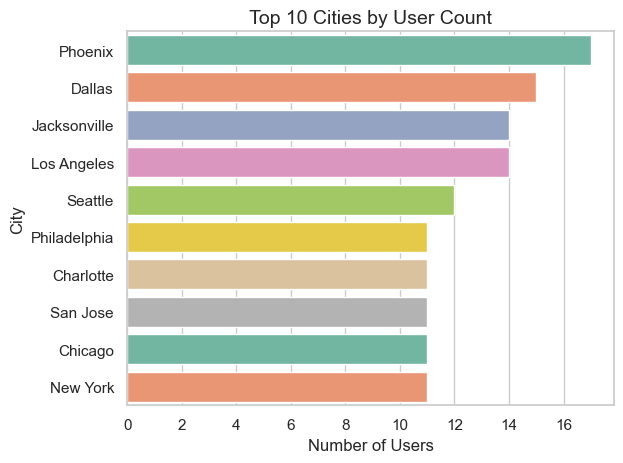

In [533]:
plt.subplot(1, 1, 1)

top_cities = df['address.city'].value_counts().head(10).reset_index()
top_cities.columns = ['city', 'count']

sns.barplot(data=top_cities, x='count', y='city', hue='city', palette='Set2', legend=False)

plt.title('Top 10 Cities by User Count', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('City')

plt.tight_layout()
plt.show()

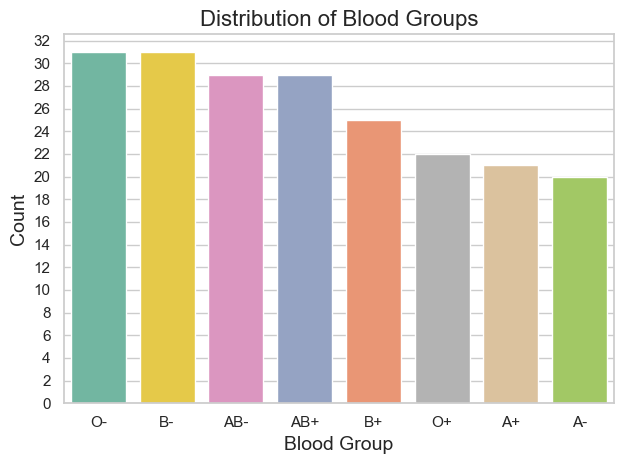

In [534]:
plt.subplot(1, 1, 1)

sns.countplot(
    data=df, 
    x='bloodGroup', 
    hue='bloodGroup', 
    order=df['bloodGroup'].value_counts().index, 
    palette='Set2',
    legend=False
)

plt.title('Distribution of Blood Groups', fontsize=16)
plt.xlabel('Blood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

plt.tight_layout()
plt.show()

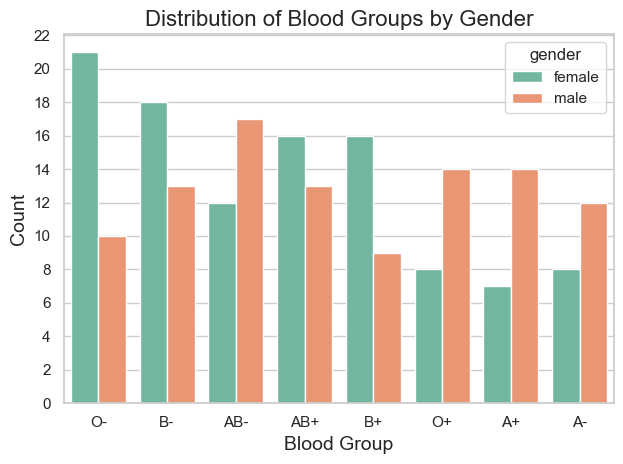

In [535]:
plt.subplot(1, 1, 1)

sns.countplot(data=df, 
              x='bloodGroup', 
              hue='gender', 
              order=df['bloodGroup'].value_counts().index, 
              palette='Set2')

plt.title('Distribution of Blood Groups by Gender', fontsize=16)
plt.xlabel('Blood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

plt.tight_layout()
plt.show()

In [536]:
df['bloodGroup_num'] = df['bloodGroup'].astype('category').cat.codes
df['gender_num'] = df['gender'].astype('category').cat.codes 

corr_age_bloodGroup = df['age'].corr(df['bloodGroup_num'])
corr_weight_bloodGroup = df['weight'].corr(df['bloodGroup_num'])
corr_height_bloodGroup = df['height'].corr(df['bloodGroup_num'])
corr_gender_bloodGroup = df['gender_num'].corr(df['bloodGroup_num'])

print(f"Correlation (Age & Blood Group): {corr_age_bloodGroup:.2f}")
print(f"Correlation (Weight & Blood Group): {corr_weight_bloodGroup:.2f}")
print(f"Correlation (Height & Blood Group): {corr_height_bloodGroup:.2f}")
print(f"Correlation (Height & Blood Group): {corr_gender_bloodGroup:.2f}")
print("close to 0 ---> almost no linear relationship")

Correlation (Age & Blood Group): -0.04
Correlation (Weight & Blood Group): -0.02
Correlation (Height & Blood Group): 0.07
Correlation (Height & Blood Group): -0.14
close to 0 ---> almost no linear relationship


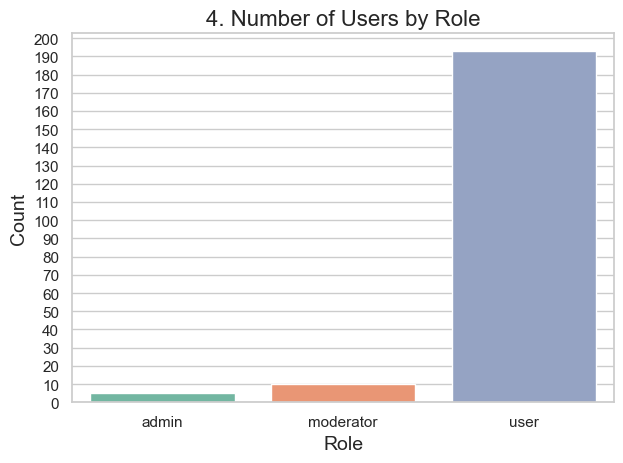

In [537]:
# Plot 4: Countplot - User Roles (Admin, Moderator, User, etc.)
plt.subplot(1, 1, 1)

sns.countplot(data=df, x='role', hue='role', palette='Set2', legend=False)

plt.title('4. Number of Users by Role', fontsize=16)
plt.xlabel('Role', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()

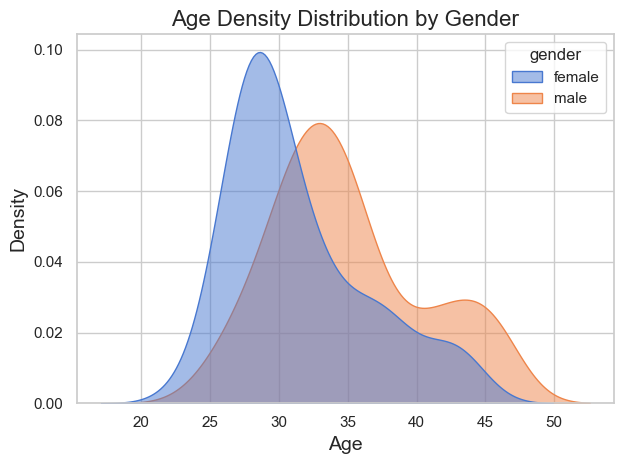

In [538]:
plt.subplot(1, 1, 1)

sns.kdeplot(data=df, x='age', hue='gender', fill=True, common_norm=False, alpha=0.5)

plt.title('Age Density Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

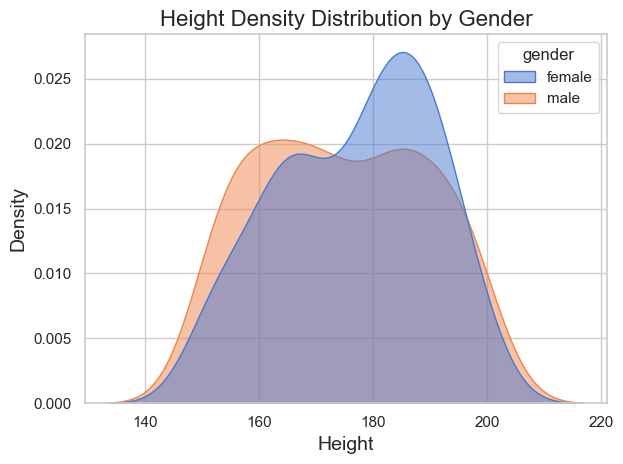

In [539]:
plt.subplot(1, 1, 1)

sns.kdeplot(data=df, x='height', hue='gender', fill=True, common_norm=False, alpha=0.5)

plt.title('Height Density Distribution by Gender', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

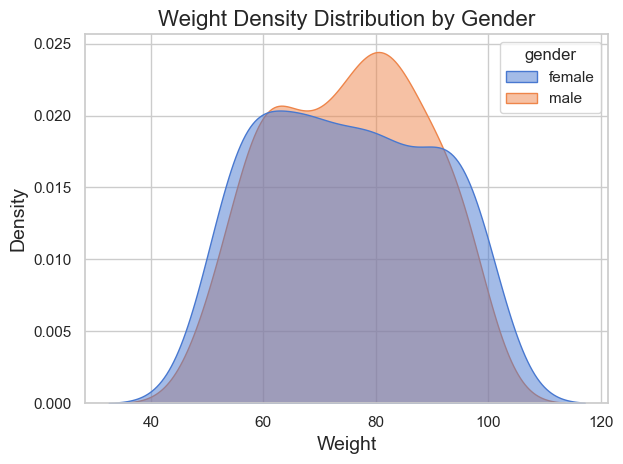

In [ ]:
plt.subplot(1, 1, 1)

sns.kdeplot(data=df, x='weight', hue='gender', fill=True, common_norm=False, alpha=0.5)

plt.title('Weight Density Distribution by Gender', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

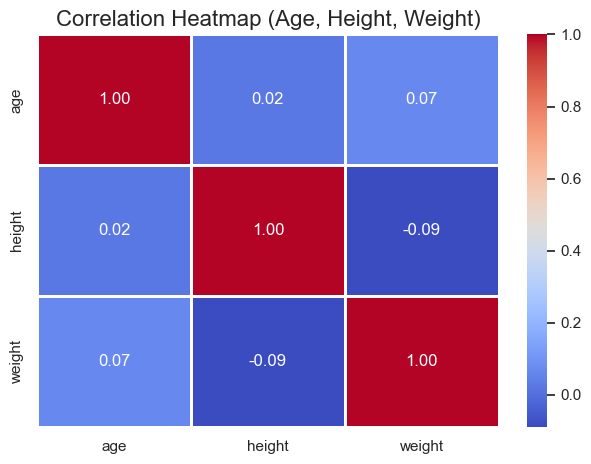

In [546]:
plt.subplot(1, 1, 1)

numeric_cols = df[['age', 'height', 'weight']]
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap (Age, Height, Weight)', fontsize=16)

plt.tight_layout()
plt.show()